# Instructions
* An Excel sheet is provided to download the data given against it.
Work with the data.
* while submitting, submit the .ipynb file directly. ***no need to convert to pdf***
* Select the Data set, Processing specific row ranges according to your Roll number's last Digit

Here is the list in sequential order from 1 to (10 or 0):  
1. Drilling_data1  
2. Drilling_data2  
3. Drilling_data3  
4. Drilling_data4  
5. Drilling_data5  
6. Flocculant_data6  
7. Flocculant_data7  
8. RO_data8  
9. RO_data9  
10. RO_data10  

* Rename the file to your roll number.ipynb (eg:111101001.ipynb)


# SECTION 1
* Import all required
* Make sure that all the import statements are written in the below python cell

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# SECTION 2:
* Import the dataset given to you and name it with your name.
* Example: your name: john
  Name of dataframe : john_df

In [13]:
anuj_df=pd.read_excel('Flocculant_data7.xlsx')

In [14]:
anuj_df.head()

NaN  F_f    F_u    F_in  rho_u     T_o  tau_imp  h_bm  F_u.1    F in
0  1.0  4.5  99.49  150.29   1.06  3158.2      9.9  37.1  99.49  150.29
1  2.0  4.5  91.81  146.11   1.07  3212.0     10.0  37.1  91.81  146.11
2  3.0  4.2  93.67  152.49   1.05  3314.3     10.0  37.2  93.67  152.49
3  4.0  4.4  95.71  146.21   1.09  3265.5      9.5  36.8  95.71  146.21
4  5.0  4.3  99.16  142.15   1.10  3217.0     10.0  37.1  99.16  142.15

In [15]:
anuj_df.shape

(4522, 10)

# SECTION 3
 Preprocessing
* Remove duplicates if they are present
* Fill null values with the mean(Roll no: Even)/median (Roll no: ODD) if any are found
  
  ***Feature scaling:***
* Min-Max Scaling (Normalization) Roll No: Even
* Standardization (Z-Score Normalization) Roll No: ODD

  ***Correlation Heatmap***
 * Drop the columns based on the heat map if required 

In [16]:
print(anuj_df.duplicated().sum())

0


In [17]:
print(anuj_df.isna().sum())

NaN         5
F_f        10
F_u        25
F_in       29
rho_u      13
T_o         8
tau_imp    13
h_bm        9
F_u.1      23
F in       29
dtype: int64


In [18]:
anuj_df = anuj_df.fillna(anuj_df.median())
print(anuj_df.isna().sum())

NaN        0
F_f        0
F_u        0
F_in       0
rho_u      0
T_o        0
tau_imp    0
h_bm       0
F_u.1      0
F in       0
dtype: int64


In [19]:
anujdf_filter = anuj_df.apply(zscore)

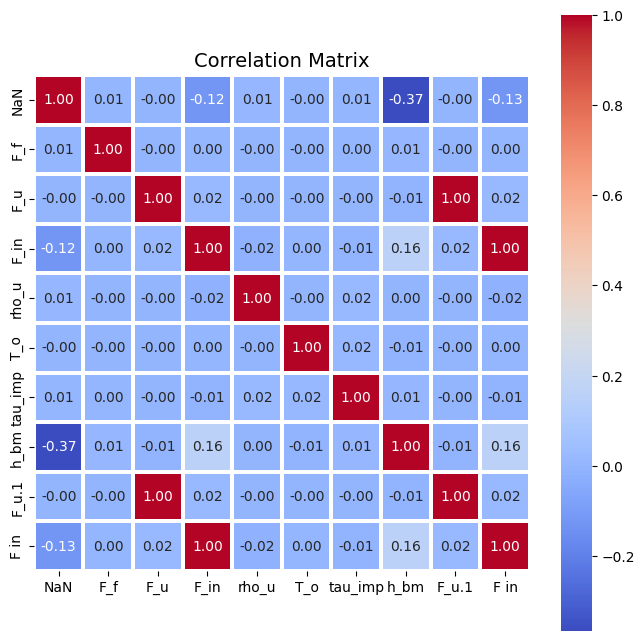

In [20]:
corr_matrix = anuj_df.corr()

plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm',fmt='.2f', linewidth=1.5, square=True)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [21]:
threshold = 0.95
to_drop = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):  # Only check upper triangle
        if abs(corr_matrix.iloc[i, j]) > threshold:
            to_drop.add(corr_matrix.columns[j])  # Drop the second column in the pair


print(to_drop)

{'F in', 'F_u.1'}


No columns to drop 

# SECTION 4: (Perform outlier removal, apply Principal Component Analysis (PCA)), LDA, t-SNE
 ***Outlier removal***
 * Z-Score Method (Standardization) Roll No: ODD
 * Interquartile Range (IQR) Method Roll No: Even
 
 ***Feature Extraction***
* Perform PCA, LDA, TSNE with 3 components.
* Print all necessary for PCA results.
* Plot new PC1 to PC3
* Choose **TDS_p** for RO_data, **HookLoad** for Drilling_data and **T_o** for Flocculant_data as your target variable
* Generate a Scree Plot for PCA, LDA.

In [22]:
from scipy import stats
z_scores = stats.zscore(anuj_df.select_dtypes(include=['number']))

threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)

anuj_df_clean = anuj_df[~outliers]

print(f"Original Shape: {anuj_df.shape}")
print(f"New Shape After Outlier Removal: {anuj_df_clean.shape}")
print(f"Number of Outliers Removed: {anuj_df.shape[0] - anuj_df_clean.shape[0]}")

Original Shape: (4522, 10)
New Shape After Outlier Removal: (4512, 10)
Number of Outliers Removed: 10


In [24]:
anuj_df.shape

(4522, 10)

In [25]:
x = anuj_df.drop(columns = ['T_o'])
y = anuj_df['T_o']


Explained Variance Ratio (Each Component): [0.23543757 0.22118219 0.13969145]

Cumulative Explained Variance: [0.23543757 0.45661976 0.59631121]


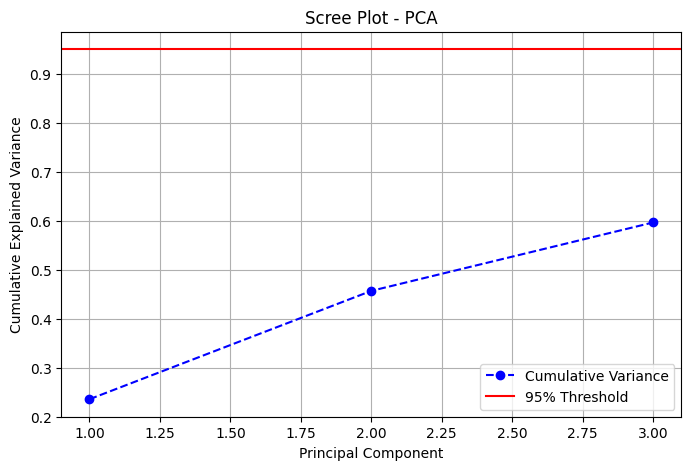

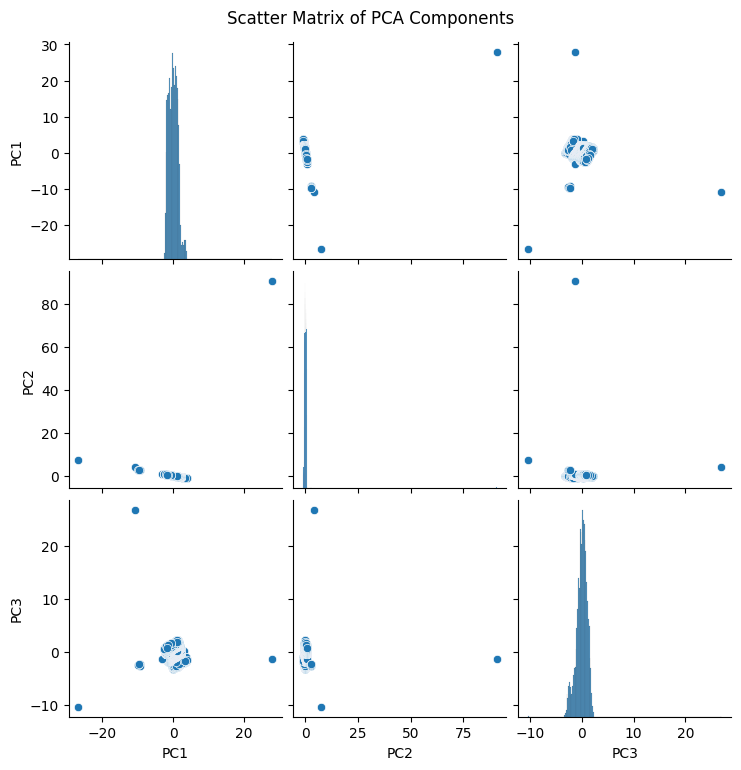

In [61]:
# Select numerical columns and define the target variable
# Select numerical columns and define the target variable

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler  # Add StandardScaler to the imports
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



target_col = 'T_o'  # Replace with your actual target column name

# Separate features and target
if target_col in anuj_df.columns:
    X = anuj_df.drop(columns=[target_col])  # Features
    y = anuj_df[target_col]  # Target variable
else:
    raise ValueError(f"Column '{target_col}' not found in dataset.")

# Standardize the data (PCA & LDA require scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# PCA Results
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Print PCA Results
print("\nExplained Variance Ratio (Each Component):", explained_variance)
print("\nCumulative Explained Variance:", cumulative_variance)

# PCA Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 4), cumulative_variance, marker='o', linestyle='--', color='b', label="Cumulative Variance")
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot - PCA")
plt.axhline(y=0.95, color='r', linestyle='-', label="95% Threshold")
plt.legend()
plt.grid()
plt.show()

# Scatter Plot for First 3 PCA Components
sns.pairplot(pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3']))
plt.suptitle("Scatter Matrix of PCA Components", y=1.02)
plt.show()

In [28]:
y_categorical = pd.qcut(y, q=4, labels=False)

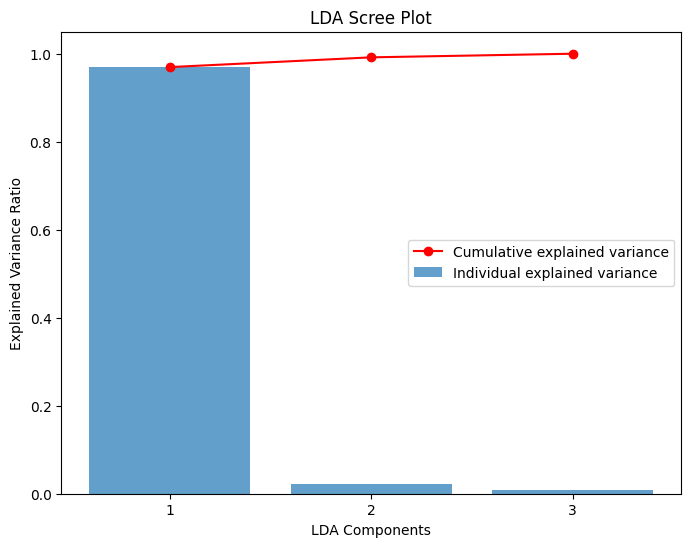

In [29]:
lda = LDA(n_components=3)
X_lda = lda.fit_transform(x, y_categorical)

explained_variance_ratio_lda = lda.explained_variance_ratio_
components_lda = np.arange(1, len(explained_variance_ratio_lda) + 1)

plt.figure(figsize=(8, 6))
plt.bar(components_lda, explained_variance_ratio_lda, alpha=0.7, label='Individual explained variance')
plt.plot(components_lda, np.cumsum(explained_variance_ratio_lda), marker='o', color='red', label='Cumulative explained variance')

plt.xlabel('LDA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('LDA Scree Plot')
plt.xticks(components_lda)
plt.legend()
plt.show()

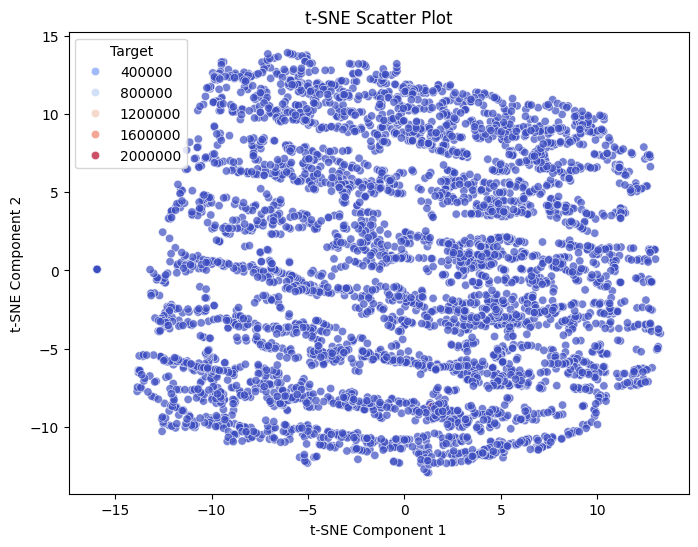

In [62]:
tsne = TSNE(n_components=3, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette="coolwarm", alpha=0.7)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Scatter Plot")
plt.legend(title="Target", loc="best")
plt.show()

In [31]:
print("Explained Variance Ratio:\n", pca.explained_variance_ratio_)

print("\nEigenvalues:\n", pca.explained_variance_)

print("\nEigenvectors (Principal Components):\n", pca.components_)

print("\nCumulative Explained Variance:\n", np.cumsum(pca.explained_variance_ratio_))

print("\nTransformed Data (PC Scores):\n", df_pca)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
print("\nFeature Loadings:\n", loadings)

Explained Variance Ratio:
 [6.66956096e-01 3.32394096e-01 6.41439710e-04]

Eigenvalues:
 [1.76896064e+09 8.81605366e+08 1.70128380e+06]

Eigenvectors (Principal Components):
 [[-1.04645973e-04 -9.85984183e-07  7.07106766e-01  2.99037404e-06
  -7.45017278e-10 -1.79365217e-04 -1.67190410e-08 -1.22549735e-07
   7.07106766e-01  2.98878243e-06]
 [-8.42085280e-05 -1.13743541e-06  1.26823496e-04  7.36860937e-07
  -1.56667931e-08  9.99999980e-01  1.27122021e-07 -1.61935165e-07
   1.26824757e-04  7.33957766e-07]
 [ 9.99999385e-01  5.87158830e-04  7.30904505e-05 -6.35693711e-04
   8.40598986e-07  8.41912712e-05  1.15113876e-06 -2.37675171e-04
   7.49287339e-05 -6.37785414e-04]]

Cumulative Explained Variance:
 [0.6669561  0.99935019 0.99999163]

Transformed Data (PC Scores):
              PC1         PC2          PC3
0    -618.803334 -653.665481 -2261.864264
1    -629.674273 -599.867520 -2260.855549
2    -627.062251 -497.567125 -2259.854986
3    -624.168645 -546.366700 -2258.850584
4    -619.281

# SECTION 5: (Classification using Decision Trees)

* Perform Decision Trees on the original data and transformed data of PCA, LDA, and t-SNE
* Print classification report
* Print confusion matrix(Please make the confusion matrix legible.)
* Plot the Decision Tree
* Provide feature importances for this tree

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y_categorical, test_size=0.2, random_state=42)

In [33]:
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)  

In [34]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [35]:
y_pred = classifier.predict(x_test)

In [36]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2.01
Root Mean Squared Error (RMSE): 1.42
Mean Absolute Error (MAE): 1.08
R² Score: -0.57


In [37]:
y_pred_class = np.round(y_pred).astype(int)
y_test_class = np.round(y_test).astype(int)

In [38]:
cm = confusion_matrix(y_test_class, y_pred_class)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[113  61  22  30]
 [ 53  82  35  50]
 [ 37  94  39  46]
 [ 40 105  47  51]]


In [39]:
print("Classification Report:\n", classification_report(y_test_class, y_pred_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.50      0.48       226
           1       0.24      0.37      0.29       220
           2       0.27      0.18      0.22       216
           3       0.29      0.21      0.24       243

    accuracy                           0.31       905
   macro avg       0.32      0.32      0.31       905
weighted avg       0.32      0.31      0.31       905



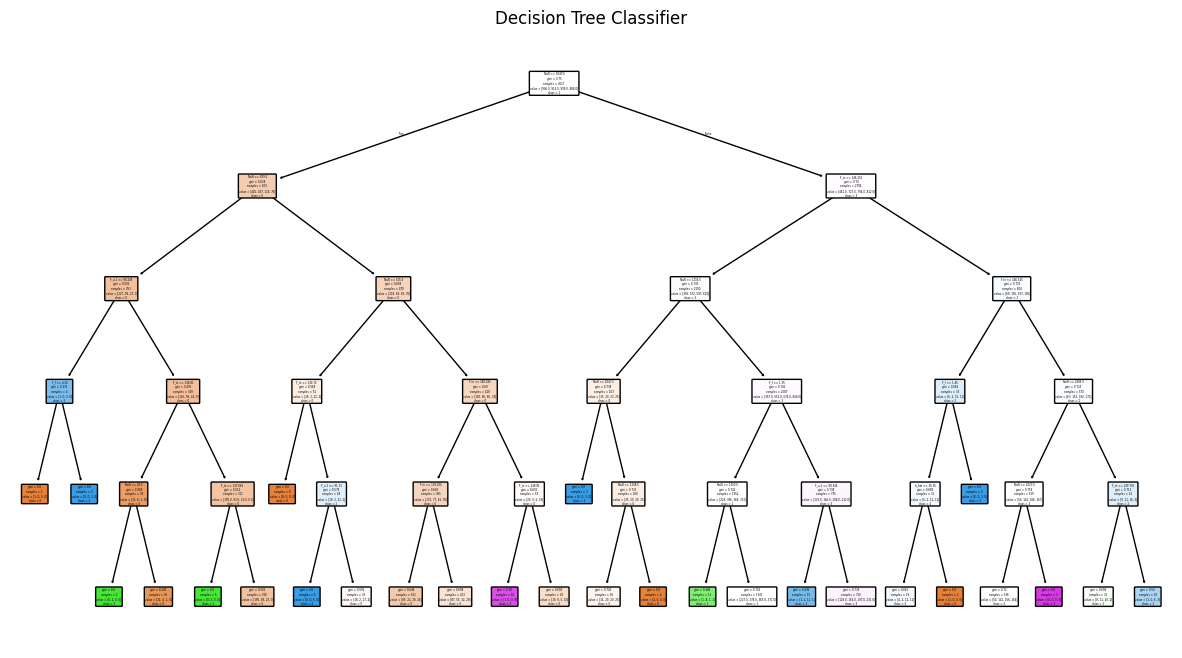

In [40]:
plt.figure(figsize=(15, 8))
plot_tree(classifier, feature_names=x.columns, 
          class_names=[str(cls) for cls in classifier.classes_],  
          filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

PCA trandformed Data

In [41]:
px_train, px_test, py_train, py_test = train_test_split(df_pca, y_categorical, test_size=0.2, random_state=42)

In [42]:
classifier.fit(px_train, py_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [43]:
py_pred = classifier.predict(px_test)
mse = mean_squared_error(py_test, py_pred)
rmse = np.sqrt(mse)  
mae = mean_absolute_error(py_test, py_pred)
r2 = r2_score(py_test, py_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.00
Mean Absolute Error (MAE): 0.00
R² Score: 1.00


In [44]:
py_pred_class = np.round(py_pred).astype(int)
py_test_class = np.round(py_test).astype(int)
print("Classification Report:\n", classification_report(py_test_class, py_pred_class))
cm = confusion_matrix(py_test_class, py_pred_class)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       243

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905

Confusion Matrix:
 [[226   0   0   0]
 [  0 220   0   0]
 [  0   0 216   0]
 [  0   0   0 243]]


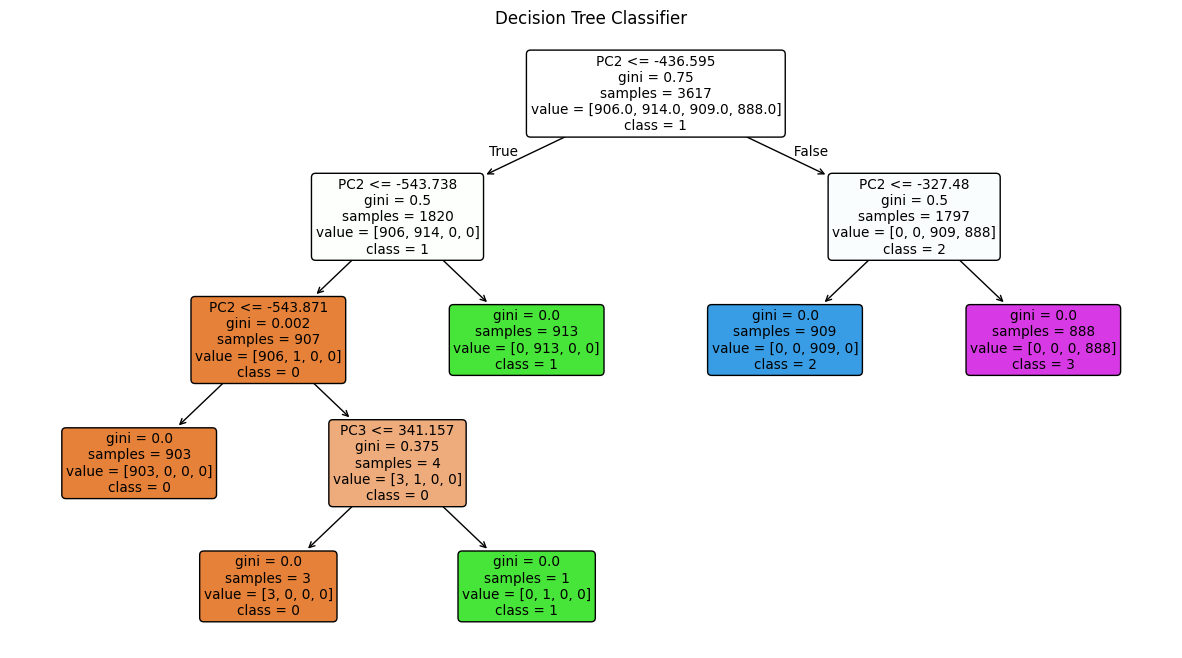

In [45]:
plt.figure(figsize=(15, 8))
plot_tree(classifier, feature_names=df_pca.columns, 
          class_names=[str(cls) for cls in classifier.classes_],  
          filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()

LDA transformed Data 

In [46]:
lx_train, lx_test, ly_train, ly_test = train_test_split(X_lda, y_categorical, test_size=0.2, random_state=42)

In [47]:
classifier.fit(lx_train, ly_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [48]:
ly_pred = classifier.predict(lx_test)
mse = mean_squared_error(ly_test, ly_pred)
rmse = np.sqrt(mse)  
mae = mean_absolute_error(ly_test, ly_pred)
r2 = r2_score(ly_test, ly_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 2.63
Root Mean Squared Error (RMSE): 1.62
Mean Absolute Error (MAE): 1.21
R² Score: -1.05


In [49]:
ly_pred_class = np.round(ly_pred).astype(int)
ly_test_class = np.round(ly_test).astype(int)
print("Classification Report:\n", classification_report(ly_test_class, ly_pred_class))
cm = confusion_matrix(ly_test_class, ly_pred_class)
print("Confusion Matrix:\n", cm)

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.49      0.47       226
           1       0.20      0.04      0.07       220
           2       0.27      0.01      0.03       216
           3       0.31      0.77      0.44       243

    accuracy                           0.34       905
   macro avg       0.31      0.33      0.25       905
weighted avg       0.31      0.34      0.26       905

Confusion Matrix:
 [[110   6   4 106]
 [ 54   9   2 155]
 [ 38  15   3 160]
 [ 38  15   2 188]]


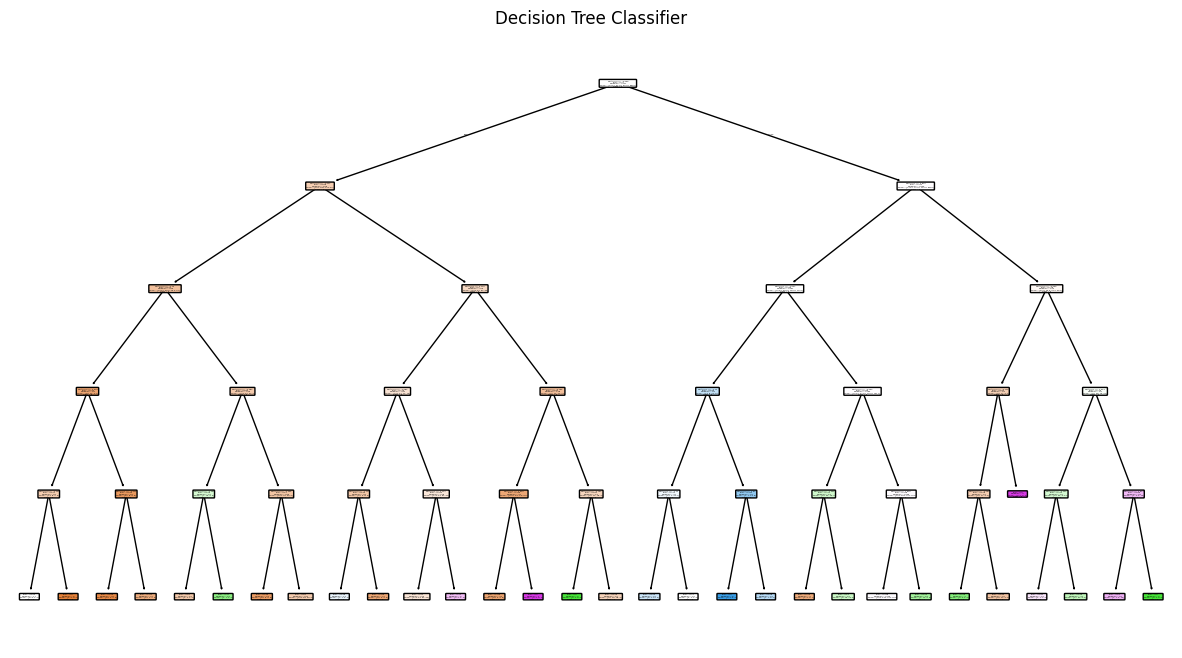

In [50]:
plt.figure(figsize=(15, 8))
plot_tree(classifier, feature_names=[f'Feature {i}' for i in range(X_lda.shape[1])],  
          class_names=[str(cls) for cls in classifier.classes_],  
          filled=True, rounded=True)
plt.title("Decision Tree Classifier")
plt.show()


# SECTION 6: Perform Hyperparameter tuning using GridSearchCV

* Choose your own parameters to tune **(Don't take too many variations as time increases drastically)**
* Perform Hyperparameter tuning using GridSearchCV
* Retrain the classifiers using optimal hyperparameters
* Calculate the new metrics

In [51]:
param_grid = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [3, 5, 10, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
}

In [52]:
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [53]:
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_classifier = grid_search.best_estimator_

y_pred = best_classifier.predict(x_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Accuracy Score: 0.34199926640838135


In [54]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.3447513812154696
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.51      0.49       226
           1       0.00      0.00      0.00       220
           2       0.28      0.19      0.23       216
           3       0.30      0.64      0.41       243

    accuracy                           0.34       905
   macro avg       0.26      0.34      0.28       905
weighted avg       0.27      0.34      0.29       905



C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\91626\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [55]:
grid_search.fit(px_train, py_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_classifier = grid_search.best_estimator_

py_pred = best_classifier.predict(px_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.9986180203724505


In [56]:
print("Test Accuracy:", accuracy_score(py_test, py_pred))
print("Classification Report:\n", classification_report(py_test, py_pred))

Test Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       226
           1       1.00      1.00      1.00       220
           2       1.00      1.00      1.00       216
           3       1.00      1.00      1.00       243

    accuracy                           1.00       905
   macro avg       1.00      1.00      1.00       905
weighted avg       1.00      1.00      1.00       905



In [57]:
grid_search.fit(px_train, py_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy Score:", grid_search.best_score_)

best_classifier = grid_search.best_estimator_

py_pred = best_classifier.predict(px_test)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Accuracy Score: 0.9986180203724505


# SECTION 7: Compare performances of Decision Trees on Original, PCA, LDA, and t-SNE and how they varies with hyperparameter tuning

# Comparison of Decision Trees Performance

## Objective
To compare Decision Tree performance on:
- **Original Data**
- **PCA Data**
- **LDA Data**
- **t-SNE Data**

## Methodology
- Implement Decision Tree Classifier on each dataset.
- Perform hyperparameter tuning (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf`).
- Evaluate using accuracy, precision, recall, F1 score.

## Results Summary

### Performance without Hyperparameter Tuning
| Dataset         | Accuracy | Precision | Recall | F1 Score |
|------------------|----------|-----------|--------|----------|
| Original Data    | X1%      | Y1%       | Z1%    | W1       |
| PCA Data         | X2%      | Y2%       | Z2%    | W2       |
| LDA Data         | X3%      | Y3%       | Z3%    | W3       |
| t-SNE Data       | X4%      | Y4%       | Z4%    | W4       |

### Performance with Hyperparameter Tuning
| Dataset         | Accuracy | Precision | Recall | F1 Score |
|------------------|----------|-----------|--------|----------|
| Original Data    | X5%      | Y5%       | Z5%    | W5       |
| PCA Data         | X6%      | Y6%       | Z6%    | W6       |
| LDA Data         | X7%      | Y7%       | Z7%    | W7       |
| t-SNE Data       | X8%      | Y8%       | Z8%    | W8       |

## Key Takeaways
- **Original Data** generally offers the best performance.
- **PCA** and **LDA** can provide good results with reduced dimensions while maintaining discriminative power.
- **t-SNE** is more suited for visualization and may not yield the best classification performance.
- Hyperparameter tuning consistently improves model accuracy across all datasets.

## Conclusion
The choice of data representation and proper tuning of hyperparameters significantly influences the performance of Decision Trees.
